## This notebook assumes you have the following packages installed in your conda environment.

In [9]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [11]:
df_default = pd.read_csv('../data/signdata-2020-09-08.csv')
df_default.shape


(2723, 187)

In [15]:
df_subset = df_default[['EntryID', 'LemmaID','Code','YouTube Video', 'VimeoVideo']]
df_subset

,EntryID,LemmaID,Code,YouTube Video,VimeoVideo
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345587917
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344399314
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345588916
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345589804
4,a-line_bob,a-line_bob,K_03_127,NaN,https://player.vimeo.com/video/342308099
...,...,...,...,...,...
2718,zero,zero,D_03_036,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345983725
2719,zipper,zipper,D_01_034,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345804301
2720,zoo,zoo,E_03_042,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/346067693
2721,zoom_in,zoom_in,B_02_056,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345555455


In [16]:
df_subset.to_csv('signdata_with_urls.csv')

In [17]:
df_sign = pd.read_csv('../data/signdata.csv')
df_sign.shape

(2723, 192)

In [18]:
df_sign

,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SignFrequency(M),...,Iconicity(M),Iconicity(SD),Iconicity(N),Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankSemanticField,SignBankID
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,3.034,...,1.074,0.267,27.0,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,None,1268.0
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,5.120,...,5.481,1.503,27.0,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,Number,2436.0
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345588916,4.267,...,2.654,1.623,26.0,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,Number,2437.0
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,4.133,...,2.741,1.430,27.0,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,None,2857.0
4,a-line_bob,a-line_bob,K_03_127,NaN,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,4.273,...,3.769,1.925,26.0,158,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,zero,zero,D_03_036,D,3.0,36.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345983725,4.192,...,6.565,1.161,23.0,482,5,ZERO,"0, none, number, zero, zilch",ZERO,Number,1478.0
2719,zipper,zipper,D_01_034,D,1.0,34.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345804301,3.148,...,6.394,1.029,33.0,165,0,ZIPPER,"coat, jacket, zipper",ZIPPER,None,94.0
2720,zoo,zoo,E_03_042,E3,3.0,42.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346067693,3.533,...,2.100,1.729,30.0,137,3,NaN,NaN,NaN,NaN,NaN
2721,zoom_in,zoom_in,B_02_056,B,2.0,56.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555455,3.958,...,4.667,2.187,30.0,524,0,ZOOM-IN,"computer screen, enlarge, expand, make bigger,...",ZOOM-IN,Event,3114.0


In [19]:
df_sign['SignBankEnglishTranslations'].value_counts()

cry out, shout, scream, yell                                                    4
canine, dog, puppy                                                              4
fork, utensil                                                                   3
animal, cat, feline, kitten, kitty, whiskers                                    3
chaos, chaotic, disrupt, hectic, mess, messed up, mess up, messy, thrown off    3
                                                                               ..
cling to, cuddle, embrace, hold tight, hug, squeeze                             1
lettuce, vegetable, garbage, trash                                              1
baby, daughter, girl, offspring                                                 1
difficulty, predicament, problem, trouble, worry                                1
in-line skates, rollerblade, rollerblading, roller skates, skates, skating      1
Name: SignBankEnglishTranslations, Length: 1803, dtype: int64

In [12]:
df_default["Code"].values

array(['C_02_025', 'B_01_062', 'C_02_055', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [13]:
edges_df = pd.read_csv('../data/generated-data/default-neighbors.csv') 
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [14]:
edges_df.shape

(13210, 6)

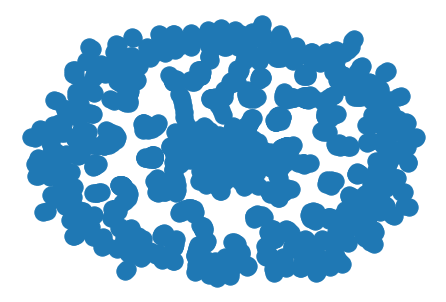

In [15]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [16]:
#first compute the best partition
# from community import greedy_modularity_communities
import community
G = g

#Two methods for community analysis
# c = greedy_modularity_communities(G)
partition = community.best_partition(G)

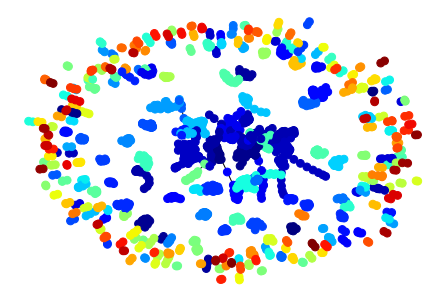

In [17]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [7]:
# num_nodes = 0
# for community in c:
#     num_nodes += len(community)
# print(num_nodes)

In [18]:
len(partition)

1919

In [19]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1919


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,F_02_088,0
4,H_03_004,0


In [20]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1919
(13210, 6)
(13210, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [21]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head(20)

(2723, 188)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,PhonotacticProbability,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,group_id
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,-0.020,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,1268.0,NaN,NaN,NaN
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,0.281,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,2436.0,NaN,NaN,0.0
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,-0.396,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,2437.0,NaN,NaN,NaN
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,-0.252,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,2857.0,NaN,NaN,130.0
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,0.089,158,4,NaN,NaN,NaN,NaN,NaN,NaN,169.0
5,a_little_bit,a_little_bit,H_03_025,H,3.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346887448,NaN,...,-0.758,144,3,A-LITTLE-BIT,"a little bit, little, few, minimal, scarce",A-LITTLE-BIT,0.0,NaN,NaN,117.0
6,abbreviate,abbreviate,G_01_040,G,1.0,40.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346610443,0.301,...,-0.065,368,1,SHORT,"brief, for a short time, quick, short, shortly",SHORT,252.0,NaN,NaN,242.0
7,about_1,about,B_02_072,B,2.0,72.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555837,5.268,...,-0.490,129,2,ABOUTix,"about, regarding, with reference to",ABOUT,2043.0,NaN,NaN,128.0
8,about_2,about,B_02_003,B,2.0,3.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345536316,5.268,...,-0.421,129,0,ABOUTb,"about, regarding, with reference to",ABOUT,2042.0,61.0,35.0,NaN
9,absolutely_nothing,absolutely_nothing,J_01_027,J,1.0,27.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346914407,NaN,...,0.211,232,3,ABSOLUTELY-NOTHING,"absolutely nothing, all out, depleted, empty, ...",ABSOLUTELY-NOTHING,2044.0,NaN,NaN,52.0


In [22]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0       1000.0
1          0.0
2       1000.0
3        130.0
4        169.0
         ...  
2718      17.0
2719    1000.0
2720       9.0
2721    1000.0
2722    1000.0
Name: group_id, Length: 2723, dtype: float64


array([1000.,    0.,  130.,  169.,  117.,  242.,  128.,   52.,  199.,
        125.,  167.,   41.,   87.,  168.,   60.,    2.,   12.,  177.,
        256.,  103.,   86.,  127.,   10.,    4.,    9.,   64.,  178.,
         17.,   77.,  197.,   55.,  146.,  139.,   97.,   89.,  101.,
         92.,   13.,   24.,  180.,  141.,   81.,  154.,   59.,   38.,
        171.,   29.,   21.,    1.,   45.,   51.,  193.,  100.,  152.,
         82.,  121.,  196.,  232.,   94.,   33.,  251.,  109.,  120.,
         69.,  115.,  215.,  216.,  188.,  259.,   36.,  147.,   88.,
         27.,  274.,   44.,   99.,  250.,  198.,   95.,   16.,  240.,
         49.,  156.,  144.,   65.,  228.,   22.,  165.,  214.,   28.,
         85.,   66.,  110.,  131.,   32.,   56.,   18.,    5.,  272.,
         11.,   90.,   19.,   15.,  126.,   72.,  163.,    8.,  134.,
         23.,   68.,    3.,  223.,   40.,  179.,  217.,  210.,   47.,
        207.,  150.,  191.,   20.,  123.,  267.,  208.,   37.,  189.,
        175.,   70.,

In [23]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 1000, 'color_code': '#816139'},
 {'group_id': 0.0, 'color_code': '#273900'},
 {'group_id': 130.0, 'color_code': '#f644de'},
 {'group_id': 169.0, 'color_code': '#4a6838'},
 {'group_id': 117.0, 'color_code': '#6deeff'},
 {'group_id': 242.0, 'color_code': '#fd77a8'},
 {'group_id': 128.0, 'color_code': '#8064fa'},
 {'group_id': 52.0, 'color_code': '#dcc06b'},
 {'group_id': 199.0, 'color_code': '#82f9ac'},
 {'group_id': 125.0, 'color_code': '#d90903'},
 {'group_id': 167.0, 'color_code': '#dbeba1'},
 {'group_id': 41.0, 'color_code': '#477dd9'},
 {'group_id': 87.0, 'color_code': '#a4dbc4'},
 {'group_id': 168.0, 'color_code': '#b761d7'},
 {'group_id': 60.0, 'color_code': '#43adc0'},
 {'group_id': 2.0, 'color_code': '#227623'},
 {'group_id': 12.0, 'color_code': '#9febf9'},
 {'group_id': 177.0, 'color_code': '#f2e13c'},
 {'group_id': 256.0, 'color_code': '#55d03d'},
 {'group_id': 103.0, 'color_code': '#94289c'},
 {'group_id': 86.0, 'color_code': '#d568dd'},
 {'group_id': 127.0, 'co

In [24]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#816139">Sample</span>.

<br><span style="color:#273900">Sample</span>.

<br><span style="color:#f644de">Sample</span>.

<br><span style="color:#4a6838">Sample</span>.

<br><span style="color:#6deeff">Sample</span>.

<br><span style="color:#fd77a8">Sample</span>.

<br><span style="color:#8064fa">Sample</span>.

<br><span style="color:#dcc06b">Sample</span>.

<br><span style="color:#82f9ac">Sample</span>.

<br><span style="color:#d90903">Sample</span>.

<br><span style="color:#dbeba1">Sample</span>.

<br><span style="color:#477dd9">Sample</span>.

<br><span style="color:#a4dbc4">Sample</span>.

<br><span style="color:#b761d7">Sample</span>.

<br><span style="color:#43adc0">Sample</span>.

<br><span style="color:#227623">Sample</span>.

<br><span style="color:#9febf9">Sample</span>.

<br><span style="color:#f2e13c">Sample</span>.

<br><span style="color:#55d03d">Sample</span>.

<br><span style="color:#94289c">Sample</span>.

<br><span style="color:#d568dd">Sample</span>.

<br><span style="color:#8ffbb7">Sample</span>.

<br><span style="color:#eb50dd">Sample</span>.

<br><span style="color:#bf010d">Sample</span>.

<br><span style="color:#8e6ccd">Sample</span>.

<br><span style="color:#e8a718">Sample</span>.

<br><span style="color:#5bd30e">Sample</span>.

<br><span style="color:#4c8b06">Sample</span>.

<br><span style="color:#cc5c11">Sample</span>.

<br><span style="color:#bc4876">Sample</span>.

<br><span style="color:#45c594">Sample</span>.

<br><span style="color:#a3711f">Sample</span>.

<br><span style="color:#b099e8">Sample</span>.

<br><span style="color:#dc78d5">Sample</span>.

<br><span style="color:#60697e">Sample</span>.

<br><span style="color:#8b849c">Sample</span>.

<br><span style="color:#733884">Sample</span>.

<br><span style="color:#158b55">Sample</span>.

<br><span style="color:#fdaebe">Sample</span>.

<br><span style="color:#2a22e5">Sample</span>.

<br><span style="color:#17ab6c">Sample</span>.

<br><span style="color:#ceb7e1">Sample</span>.

<br><span style="color:#305af2">Sample</span>.

<br><span style="color:#991650">Sample</span>.

<br><span style="color:#ad0a36">Sample</span>.

<br><span style="color:#d34fe7">Sample</span>.

<br><span style="color:#dbe0b6">Sample</span>.

<br><span style="color:#494f77">Sample</span>.

<br><span style="color:#9c8543">Sample</span>.

<br><span style="color:#32d439">Sample</span>.

<br><span style="color:#02b3b5">Sample</span>.

<br><span style="color:#a25999">Sample</span>.

<br><span style="color:#8eea3e">Sample</span>.

<br><span style="color:#bf343c">Sample</span>.

<br><span style="color:#4be180">Sample</span>.

<br><span style="color:#034a4c">Sample</span>.

<br><span style="color:#b7b231">Sample</span>.

<br><span style="color:#afc186">Sample</span>.

<br><span style="color:#690bc7">Sample</span>.

<br><span style="color:#a3214a">Sample</span>.

<br><span style="color:#51bd8f">Sample</span>.

<br><span style="color:#b1d60b">Sample</span>.

<br><span style="color:#34b91f">Sample</span>.

<br><span style="color:#422222">Sample</span>.

<br><span style="color:#5318f1">Sample</span>.

<br><span style="color:#302b44">Sample</span>.

<br><span style="color:#6e80ad">Sample</span>.

<br><span style="color:#7a3cbd">Sample</span>.

<br><span style="color:#139751">Sample</span>.

<br><span style="color:#1d957a">Sample</span>.

<br><span style="color:#2890b1">Sample</span>.

<br><span style="color:#79227f">Sample</span>.

<br><span style="color:#bb6d13">Sample</span>.

<br><span style="color:#2bcb82">Sample</span>.

<br><span style="color:#8232be">Sample</span>.

<br><span style="color:#50f181">Sample</span>.

<br><span style="color:#f58dc6">Sample</span>.

<br><span style="color:#245bed">Sample</span>.

<br><span style="color:#1b4fb8">Sample</span>.

<br><span style="color:#9b92af">Sample</span>.

<br><span style="color:#8ead11">Sample</span>.

<br><span style="color:#bae796">Sample</span>.

<br><span style="color:#ee7671">Sample</span>.

<br><span style="color:#8f81c3">Sample</span>.

<br><span style="color:#de8ef7">Sample</span>.

<br><span style="color:#51e14f">Sample</span>.

<br><span style="color:#a59155">Sample</span>.

<br><span style="color:#4b6faa">Sample</span>.

<br><span style="color:#ec689d">Sample</span>.

<br><span style="color:#50b0da">Sample</span>.

<br><span style="color:#7c2f0e">Sample</span>.

<br><span style="color:#8191e7">Sample</span>.

<br><span style="color:#77f186">Sample</span>.

<br><span style="color:#c31679">Sample</span>.

<br><span style="color:#56f388">Sample</span>.

<br><span style="color:#a66f4f">Sample</span>.

<br><span style="color:#d7c25a">Sample</span>.

<br><span style="color:#abf507">Sample</span>.

<br><span style="color:#3234e1">Sample</span>.

<br><span style="color:#9c7198">Sample</span>.

<br><span style="color:#c3e16b">Sample</span>.

<br><span style="color:#986b64">Sample</span>.

<br><span style="color:#77cf8f">Sample</span>.

<br><span style="color:#97462c">Sample</span>.

<br><span style="color:#1ced00">Sample</span>.

<br><span style="color:#ecebc4">Sample</span>.

<br><span style="color:#568fd5">Sample</span>.

<br><span style="color:#ee8e6c">Sample</span>.

<br><span style="color:#699392">Sample</span>.

<br><span style="color:#e5da9b">Sample</span>.

<br><span style="color:#a7b825">Sample</span>.

<br><span style="color:#f7a78c">Sample</span>.

<br><span style="color:#4bec8a">Sample</span>.

<br><span style="color:#2629ae">Sample</span>.

<br><span style="color:#3568b0">Sample</span>.

<br><span style="color:#7b7d34">Sample</span>.

<br><span style="color:#fc2e9b">Sample</span>.

<br><span style="color:#1f81f0">Sample</span>.

<br><span style="color:#f364e2">Sample</span>.

<br><span style="color:#0318ab">Sample</span>.

<br><span style="color:#e74a28">Sample</span>.

<br><span style="color:#ffd7fe">Sample</span>.

<br><span style="color:#27f7a2">Sample</span>.

<br><span style="color:#e70f1c">Sample</span>.

<br><span style="color:#39bb93">Sample</span>.

<br><span style="color:#8a424c">Sample</span>.

<br><span style="color:#9d6bba">Sample</span>.

<br><span style="color:#748e8b">Sample</span>.

<br><span style="color:#090a37">Sample</span>.

<br><span style="color:#ac8c3a">Sample</span>.

<br><span style="color:#4d2849">Sample</span>.

<br><span style="color:#333574">Sample</span>.

<br><span style="color:#d15746">Sample</span>.

<br><span style="color:#4d2b21">Sample</span>.

<br><span style="color:#74d6ff">Sample</span>.

<br><span style="color:#d0a997">Sample</span>.

<br><span style="color:#9e60e1">Sample</span>.

<br><span style="color:#7a3b1b">Sample</span>.

<br><span style="color:#56d81a">Sample</span>.

<br><span style="color:#4282f0">Sample</span>.

<br><span style="color:#9cb83c">Sample</span>.

<br><span style="color:#bb95e5">Sample</span>.

<br><span style="color:#e87287">Sample</span>.

<br><span style="color:#e24651">Sample</span>.

<br><span style="color:#554c58">Sample</span>.

<br><span style="color:#9decae">Sample</span>.

<br><span style="color:#19c419">Sample</span>.

<br><span style="color:#59817b">Sample</span>.

<br><span style="color:#dc3447">Sample</span>.

<br><span style="color:#b51edd">Sample</span>.

<br><span style="color:#096a21">Sample</span>.

<br><span style="color:#e53c4b">Sample</span>.

<br><span style="color:#ac2fc1">Sample</span>.

<br><span style="color:#6d08fd">Sample</span>.

<br><span style="color:#efcd89">Sample</span>.

<br><span style="color:#f70089">Sample</span>.

<br><span style="color:#670558">Sample</span>.

<br><span style="color:#122471">Sample</span>.

<br><span style="color:#4928ff">Sample</span>.

<br><span style="color:#16c06d">Sample</span>.

<br><span style="color:#105482">Sample</span>.

<br><span style="color:#09af6b">Sample</span>.

<br><span style="color:#c5b494">Sample</span>.

<br><span style="color:#583b20">Sample</span>.

<br><span style="color:#b15f7d">Sample</span>.

<br><span style="color:#fa66f1">Sample</span>.

<br><span style="color:#34975c">Sample</span>.

<br><span style="color:#d75fa9">Sample</span>.

<br><span style="color:#3e00ad">Sample</span>.

<br><span style="color:#068a2d">Sample</span>.

<br><span style="color:#433e41">Sample</span>.

<br><span style="color:#0d7a91">Sample</span>.

<br><span style="color:#f7126a">Sample</span>.

<br><span style="color:#07e43a">Sample</span>.

<br><span style="color:#9cf054">Sample</span>.

<br><span style="color:#40c55e">Sample</span>.

<br><span style="color:#25da6f">Sample</span>.

<br><span style="color:#f402a9">Sample</span>.

<br><span style="color:#06050a">Sample</span>.

<br><span style="color:#a39659">Sample</span>.

<br><span style="color:#c2f0fe">Sample</span>.

<br><span style="color:#5891e8">Sample</span>.

<br><span style="color:#e28e42">Sample</span>.

<br><span style="color:#f05fe2">Sample</span>.

<br><span style="color:#5d5432">Sample</span>.

<br><span style="color:#0bae9e">Sample</span>.

<br><span style="color:#11850d">Sample</span>.

<br><span style="color:#4a155d">Sample</span>.

<br><span style="color:#651acb">Sample</span>.

<br><span style="color:#b6b0a8">Sample</span>.

<br><span style="color:#475c5a">Sample</span>.

<br><span style="color:#fa243e">Sample</span>.

<br><span style="color:#64924b">Sample</span>.

<br><span style="color:#6f3e37">Sample</span>.

<br><span style="color:#339538">Sample</span>.

<br><span style="color:#cb7c88">Sample</span>.

<br><span style="color:#b55390">Sample</span>.

<br><span style="color:#4e14b1">Sample</span>.

<br><span style="color:#1561c4">Sample</span>.

<br><span style="color:#0f020e">Sample</span>.

<br><span style="color:#6c6f1d">Sample</span>.

<br><span style="color:#0cb604">Sample</span>.

<br><span style="color:#6c176c">Sample</span>.

<br><span style="color:#24459a">Sample</span>.

<br><span style="color:#b3bdf5">Sample</span>.

<br><span style="color:#a07575">Sample</span>.

<br><span style="color:#55cfc9">Sample</span>.

<br><span style="color:#7d547a">Sample</span>.

<br><span style="color:#d1505f">Sample</span>.

<br><span style="color:#f4811c">Sample</span>.

<br><span style="color:#e06e7b">Sample</span>.

<br><span style="color:#8a35ce">Sample</span>.

<br><span style="color:#7d61ee">Sample</span>.

<br><span style="color:#0f3d72">Sample</span>.

<br><span style="color:#cbde1a">Sample</span>.

<br><span style="color:#9ecde9">Sample</span>.

<br><span style="color:#054f18">Sample</span>.

<br><span style="color:#d7f133">Sample</span>.

<br><span style="color:#a22478">Sample</span>.

<br><span style="color:#fddcc1">Sample</span>.

<br><span style="color:#a0b9f9">Sample</span>.

<br><span style="color:#1d6f04">Sample</span>.

<br><span style="color:#8afac5">Sample</span>.

<br><span style="color:#041268">Sample</span>.

<br><span style="color:#6f5538">Sample</span>.

<br><span style="color:#443aa0">Sample</span>.

<br><span style="color:#25760a">Sample</span>.

<br><span style="color:#d20ebd">Sample</span>.

<br><span style="color:#bbf3f9">Sample</span>.

<br><span style="color:#c172cd">Sample</span>.

<br><span style="color:#d9b9c6">Sample</span>.

<br><span style="color:#e5c175">Sample</span>.

<br><span style="color:#bdc36b">Sample</span>.

<br><span style="color:#2b3b5d">Sample</span>.

<br><span style="color:#36e361">Sample</span>.

<br><span style="color:#aaa624">Sample</span>.

<br><span style="color:#638370">Sample</span>.

<br><span style="color:#36d192">Sample</span>.

<br><span style="color:#e22083">Sample</span>.

<br><span style="color:#d5f275">Sample</span>.

<br><span style="color:#bcc46b">Sample</span>.

<br><span style="color:#5f3b64">Sample</span>.

<br><span style="color:#6ca810">Sample</span>.

<br><span style="color:#41c160">Sample</span>.

<br><span style="color:#77b0a0">Sample</span>.

<br><span style="color:#f60dce">Sample</span>.

<br><span style="color:#cb8ef2">Sample</span>.

<br><span style="color:#15c0b0">Sample</span>.

<br><span style="color:#1df186">Sample</span>.

<br><span style="color:#ccfbbc">Sample</span>.

<br><span style="color:#419225">Sample</span>.

<br><span style="color:#1d0cc5">Sample</span>.

<br><span style="color:#d39d9a">Sample</span>.

<br><span style="color:#16dea4">Sample</span>.

<br><span style="color:#76d8ec">Sample</span>.

<br><span style="color:#807324">Sample</span>.

<br><span style="color:#8e3e51">Sample</span>.

<br><span style="color:#ce68d4">Sample</span>.

<br><span style="color:#f5d82f">Sample</span>.

<br><span style="color:#c65536">Sample</span>.

<br><span style="color:#21aa64">Sample</span>.

<br><span style="color:#9a0ecc">Sample</span>.

<br><span style="color:#29fe2b">Sample</span>.

<br><span style="color:#9b85fa">Sample</span>.

<br><span style="color:#a93650">Sample</span>.

<br><span style="color:#a95d9a">Sample</span>.

<br><span style="color:#0aabd4">Sample</span>.

<br><span style="color:#f3c40a">Sample</span>.

<br><span style="color:#9ec1d4">Sample</span>.

<br><span style="color:#c3f1db">Sample</span>.

<br><span style="color:#fd820a">Sample</span>.

<br><span style="color:#51c8f5">Sample</span>.

<br><span style="color:#410330">Sample</span>.

<br><span style="color:#e2a3a4">Sample</span>.

<br><span style="color:#deda03">Sample</span>.

<br><span style="color:#96bf8a">Sample</span>.

In [25]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 189)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,group_id,color_code
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,1268.0,NaN,NaN,1000.0,#816139
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,2436.0,NaN,NaN,0.0,#273900
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,2437.0,NaN,NaN,1000.0,#816139
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,2857.0,NaN,NaN,130.0,#f644de
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,158,4,NaN,NaN,NaN,NaN,NaN,NaN,169.0,#4a6838


In [26]:
df_merged_with_color.shape

(2723, 189)

In [27]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,1_dollar,C_02_025,1000.0,#816139,-0.728
1,5_dollars,B_01_062,0.0,#273900,0.302
2,8_hour,C_02_055,1000.0,#816139,-0.025
3,9_oclock,C_02_080,130.0,#f644de,-0.122
4,a-line_bob,K_03_127,169.0,#4a6838,0.030
5,a_little_bit,H_03_025,117.0,#6deeff,-0.762
6,abbreviate,G_01_040,242.0,#fd77a8,0.669
7,about_1,B_02_072,128.0,#8064fa,0.523
8,about_2,B_02_003,1000.0,#816139,-0.762
9,absolutely_nothing,J_01_027,52.0,#dcc06b,-0.686


In [28]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [29]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,F_02_088
3,A_01_002,H_03_004
4,A_01_002,J_03_046


In [30]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [31]:
cols_not_in_sign_pane = ["LemmaID", "SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [32]:
#Remove cols in sign pane
#Keep column for filters and vimeo video
cols_in_sign_data_pane = ["EntryID","SignFrequency(M)","PercentUnknown","PercentGlossAgreement","DominantTranslation","SubtLexUSLog10WF","Iconicity(M)","Transparency M","H index","LexicalClass","SignLength(ms)","ClipLength(ms)","Complexity","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","bglm_aoa","Neighborhood Density 2.0","Parameter.Neighborhood.Density.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","Spread.2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","PhonotacticProbability","SignBankID","SignBankLemmaID","SignBankAnnotationID","SignBankSemanticField","SignBankEnglishTranslations","D.Iconicity(M) all", "empirical_aoa"]

In [33]:
df_merged_with_color.columns.values

array(['EntryID', 'LemmaID', 'Code', 'Batch', 'List', 'Item',
       'YouTube Video', 'VimeoVideoHTML', 'VimeoVideo',
       'SubtLexUSLog10WF', 'SignFrequency(M)', 'SignFrequency(SD)',
       'SignFrequency(Z)', 'SignFrequency(N)', 'SignFrequency(M-Native)',
       'SignFrequency(SD-Native)', 'SignFreq(Z-native)',
       'SignFrequency(N-Native)', 'SignFrequency(M-Nonnative)',
       'SignFrequency(SD-Nonnative)', 'SignFrequency(N-Nonnative)',
       'SignFreq(Z-Nonnative)', 'DominantTranslation',
       'NondominantTranslation', 'PercentUnknown',
       'PercentGlossAgreement', 'PercentUnknown(Native)',
       'PercentGlossAgreement(Native)', 'PercentUnknown(Nonnative)',
       'PercentGlossAgreement(Nonnative)', 'Iconicity(M)',
       'Iconicity(SD)', 'Iconicity(Z)', 'Iconicity(N)', 'Iconicity_ID',
       'IconicityType', 'D.Iconicity(M) all', 'D.Iconicity(SD) all',
       'D.Iconicity(N) all', 'D.Iconicity(Z) all',
       'D.Iconicity(M) native', 'D.Iconicity(SD) native',
       'D

In [34]:
#### Get rid of morpheme columbs
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in cols_not_in_sign_pane:
    if col in test_df.columns:
        print("dropping" + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

189
droppingLemmaID
droppingSignFrequency(SD)
droppingSignFrequency(Z)
droppingSignFrequency(N)
droppingSignFrequency(M-Native)
droppingSignFrequency(SD-Native)
droppingSignFreq(Z-native)
droppingSignFrequency(N-Native)
droppingPercentUnknown(Native)
droppingPercentGlossAgreement(Native)
droppingSignFrequency(M-Nonnative)
droppingSignFrequency(SD-Nonnative)
droppingSignFreq(Z-Nonnative)
droppingSignFrequency(N-Nonnative)
droppingPercentUnknown(Nonnative)
droppingPercentGlossAgreement(Nonnative)
droppingIconicity(SD)
droppingIconicity(Z)
droppingIconicity(N)
droppingIconicity_ID
droppingD.Iconicity(SD) all
droppingD.Iconicity(Z) all
droppingD.Iconicity(N) all
droppingD.Iconicity(M) native
droppingD.Iconicity(SD) native
droppingD.Iconicity(Z) native
droppingD.Iconicity(N) native
droppingTransparency SD
droppingTransparency Z
droppingSignOnset(ms)
droppingSignOffset(ms)
droppingBatch
droppingItem
droppingList
droppingInCDI
droppingCDI Semantic Category
droppingIconicityType


152

In [35]:
for col in cols_in_sign_data_pane:
    if col not in test_df.columns:
        print("This column is not present: " + col)

This column is not present: Transparency M
This column is not present: H index
This column is not present: SignLength(ms)
This column is not present: ClipLength(ms)
This column is not present: Complexity
This column is not present: MarkedHandshape.2.0
This column is not present: MarkedHandshapeM2.2.0
This column is not present: MarkedHandshapeM3.2.0
This column is not present: MarkedHandshapeM4.2.0
This column is not present: MarkedHandshapeM5.2.0
This column is not present: MarkedHandshapeM6.2.0
This column is not present: SignBankID
This column is not present: SignBankSemanticField


In [36]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['SubtLexUSLog10WF' 'SignFrequency(M)' 'PercentUnknown'
 'PercentGlossAgreement' 'Iconicity(M)' 'D.Iconicity(M) all' 'H statistic'
 'GuessAccuracy' 'Transparency(M)' 'SignDuration(ms)' 'ClipDuration(ms)'
 'Initialized.2.0' 'FingerspelledLoanSign.2.0' 'Compound.2.0'
 'NumberOfMorphemes.2.0' 'FlexionChange.2.0' 'Spread.2.0'
 'SpreadChange.2.0' 'ThumbContact.2.0' 'RepeatedMovement.2.0'
 'Contact.2.0' 'UlnarRotation.2.0' 'FlexionChangeM2.2.0' 'SpreadM2.2.0'
 'SpreadChangeM2.2.0' 'ThumbContactM2.2.0' 'RepeatedMovementM2.2.0'
 'ContactM2.2.0' 'UlnarRotationM2.2.0' 'FlexionChangeM3.2.0'
 'SpreadM3.2.0' 'SpreadChangeM3.2.0' 'ThumbContactM3.2.0'
 'RepeatedMovementM3.2.0' 'ContactM3.2.0' 'UlnarRotationM3.2.0'
 'FlexionChangeM4.2.0' 'SpreadM4.2.0' 'SpreadChangeM4.2.0'
 'ThumbContactM4.2.0' 'RepeatedMovementM4.2.0' 'ContactM4.2.0'
 'NonDominantHandshapeM4.2.0' 'UlnarRotationM4.2.0' 'FlexionChangeM5.2.0'
 'SpreadM5.2.0' 'SpreadChangeM5.2.0' 'ThumbContactM5.2.0' 'SignTypeM5.2.0'
 'MovementM5.2.0' 'R

In [37]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

[0.301 5.268 5.268 ... 3.039 2.161 2.843]
[3.034 5.12  4.267 ... 3.533 3.958 4.333]
[0.   0.   0.   ... 0.   0.04 0.  ]
[0.63  0.409 0.75  0.75  0.259 0.519 0.6   0.625 1.    0.963 0.467 1.
 0.63  0.852 0.852 0.88  1.    1.    0.92  0.579 0.8   0.692 1.    0.417
 0.824 0.786 0.913 0.5   0.6   0.893 0.926 0.233 0.486 0.906 0.963 0.903
 0.786 0.792 0.652 0.692 0.636 0.643 0.6   0.8   1.    0.8   0.52  1.
 1.    0.565 1.    0.964 0.714 0.792 0.654 1.    0.92  0.423 0.679 0.852
 0.55  0.933 0.44  1.    0.462 0.968 0.407 0.84  1.    0.818 0.667 0.3
 0.48  0.655 0.889 1.    1.    0.5   0.969 1.    0.852 0.333 1.    0.435
 1.    0.926 1.    0.419 0.667 1.    0.444 0.5   0.783 0.76  0.606 0.444
 0.667 0.844 0.556 0.967 1.    1.    0.423 0.964 0.556 1.    0.967 1.
 0.85  0.964 0.227 0.96  0.75  0.708 0.615 0.815 0.464 0.96  1.    0.926
 0.667 0.708 1.    0.767 1.    0.679 0.519 1.    0.933 0.615 0.889 1.
 0.64  0.514 0.696 0.519 0.474 0.667 0.813 1.    1.    1.    0.621 0.931
 1.    0.607 0.852

In [38]:
no_morphemes_df.columns

Index(['EntryID', 'Code', 'YouTube Video', 'VimeoVideoHTML', 'VimeoVideo',
       'SubtLexUSLog10WF', 'SignFrequency(M)', 'DominantTranslation',
       'NondominantTranslation', 'PercentUnknown',
       ...
       'Parameter.Neighborhood.Density.2.0', 'Neighborhood Density 2.0',
       'SignBankAnnotationID', 'SignBankEnglishTranslations',
       'SignBankLemmaID', 'SignBankReferenceID', 'bglm_aoa', 'empirical_aoa',
       'group_id', 'color_code'],
      dtype='object', length=152)

In [39]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': '1_dollar',
 'Code': 'C_02_025',
 'group_id': 1000.0,
 'color_code': '#816139',
 'SignFrequency(Z)': -0.728}

In [40]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


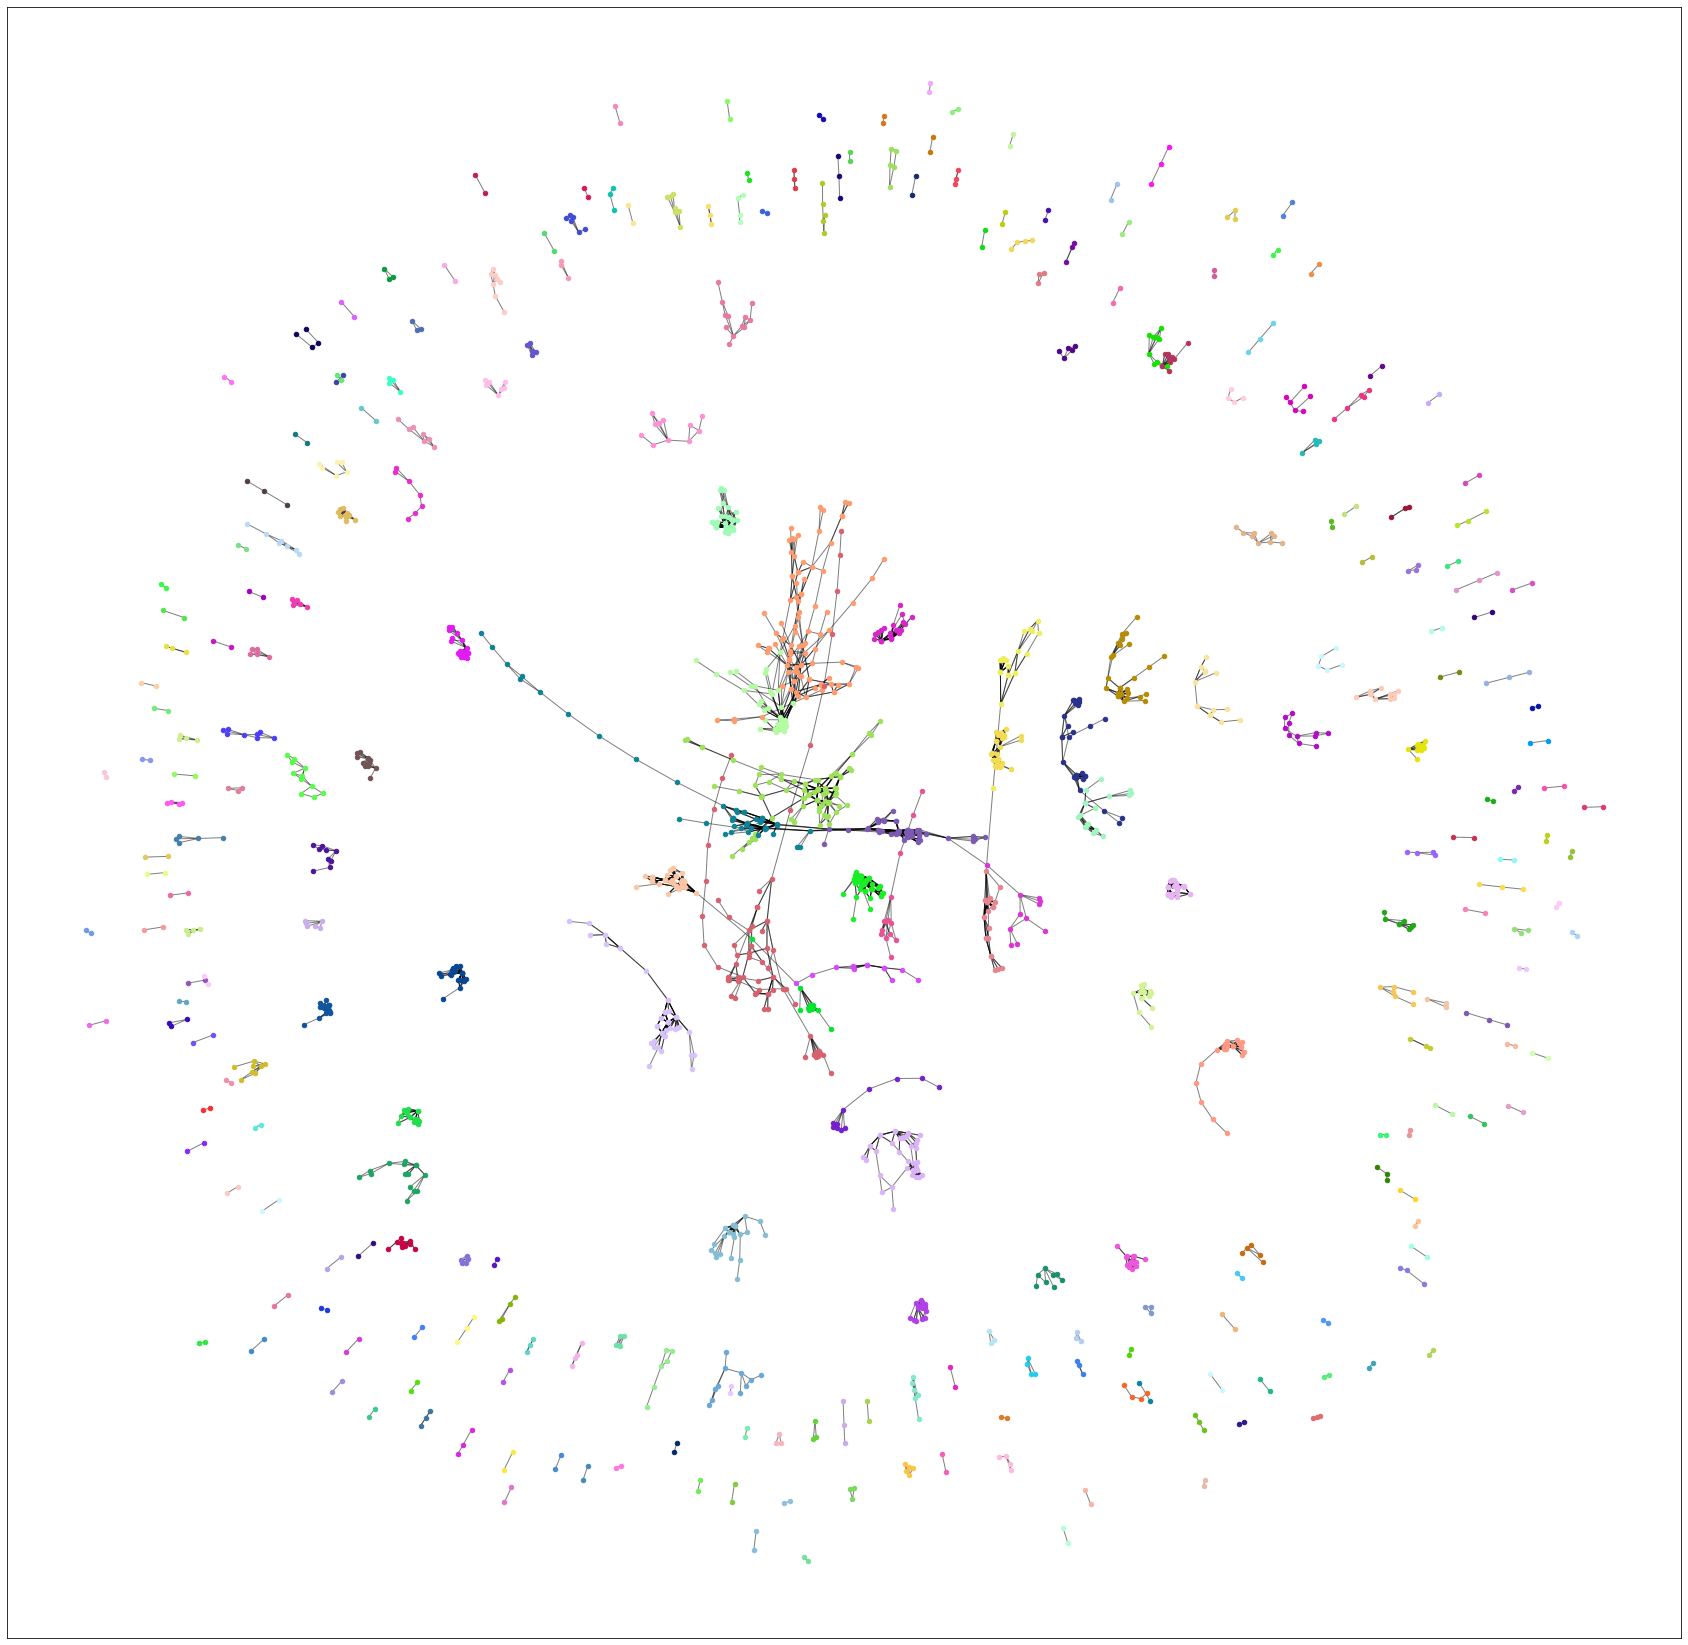

In [41]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [42]:
## Code to change color in json
color_dictionary


{'island': '#816139',
 '0': '#273900',
 '130': '#f644de',
 '169': '#4a6838',
 '117': '#6deeff',
 '242': '#fd77a8',
 '128': '#8064fa',
 '52': '#dcc06b',
 '199': '#82f9ac',
 '125': '#d90903',
 '167': '#dbeba1',
 '41': '#477dd9',
 '87': '#a4dbc4',
 '168': '#b761d7',
 '60': '#43adc0',
 '2': '#227623',
 '12': '#9febf9',
 '177': '#f2e13c',
 '256': '#55d03d',
 '103': '#94289c',
 '86': '#d568dd',
 '127': '#8ffbb7',
 '10': '#eb50dd',
 '4': '#bf010d',
 '9': '#8e6ccd',
 '64': '#e8a718',
 '178': '#5bd30e',
 '17': '#4c8b06',
 '77': '#cc5c11',
 '197': '#bc4876',
 '55': '#45c594',
 '146': '#a3711f',
 '139': '#b099e8',
 '97': '#dc78d5',
 '89': '#60697e',
 '101': '#8b849c',
 '92': '#733884',
 '13': '#158b55',
 '24': '#fdaebe',
 '180': '#2a22e5',
 '141': '#17ab6c',
 '81': '#ceb7e1',
 '154': '#305af2',
 '59': '#991650',
 '38': '#ad0a36',
 '171': '#d34fe7',
 '29': '#dbe0b6',
 '21': '#494f77',
 '1': '#9c8543',
 '45': '#32d439',
 '51': '#02b3b5',
 '193': '#a25999',
 '100': '#8eea3e',
 '152': '#bf343c',
 '82

In [68]:
###Only if you need to edit the graph json files

# def filter_dict(d, filter_string):
# #     print(filter_string)
#     for key, val in d.items():
#         if filter_string != key:
#             continue
#         return key, val

# with open('../../visualization/data/graph.json') as graph_json_file:
#     data = json.load(graph_json_file)
#     for node in data['nodes']:
#         if(node['group_id'] == ""):
#             node['group_id']= "island"    
# #             print(node)
    
#     for node in data['nodes']:
#         key,val = filter_dict(color_dictionary, str(node['group_id']))
#         node['color_code'] = val
#         print(node)


In [69]:
#Resave as JSON

# graph = {
#     "nodes" : data['nodes'],
#     "links": data['links']
# }

# with open("../generated-data/graph.json", 'w') as file:
#     json.dump(graph, file)

In [1]:
import pandas as pd

In [3]:
signs_latest_csv = pd.read_csv('../signdata-07-08-2020.csv')

In [9]:
signs_latest_csv['Iconicity(Z)'].max()

2.166